<a href="https://colab.research.google.com/github/ralbu85/DataScience_2022S/blob/master/%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C_%EC%8B%A4%EC%8A%B5_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('country.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [2]:
# 변수 선택하기
country = df['country']
df2 = df.drop(columns=['country'])

In [3]:
# 정규화하기
df_norm = (df2-df2.mean())/df2.std()

In [7]:
# PCA 불러오기
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_norm)
vector, value = pca.components_, pca.explained_variance_ # 고유벡터, 고유값
Z = pca.transform(df_norm) # 주성분에 따라 정사영

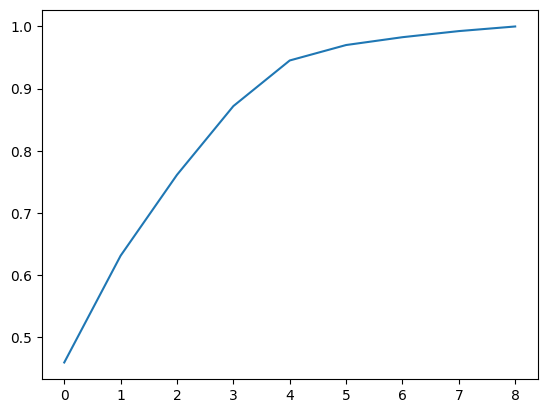

In [9]:
# 주성분 설명력 보기
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_)) # 주성분 2개 사용시 60% 정도의 변동성을 설명

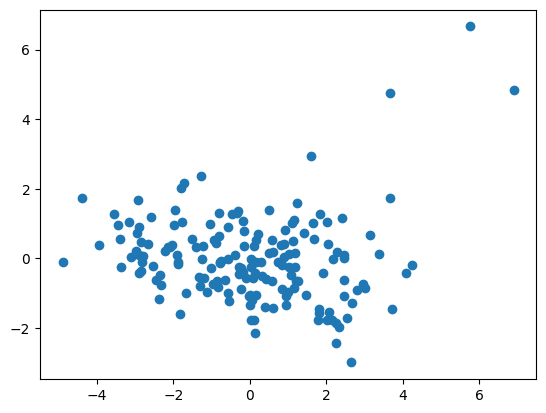

In [10]:
## 주성분 2개 선택하여 그리기

z1 = Z[:,0]
z2 = Z[:,1]

plt.scatter(z1,z2)


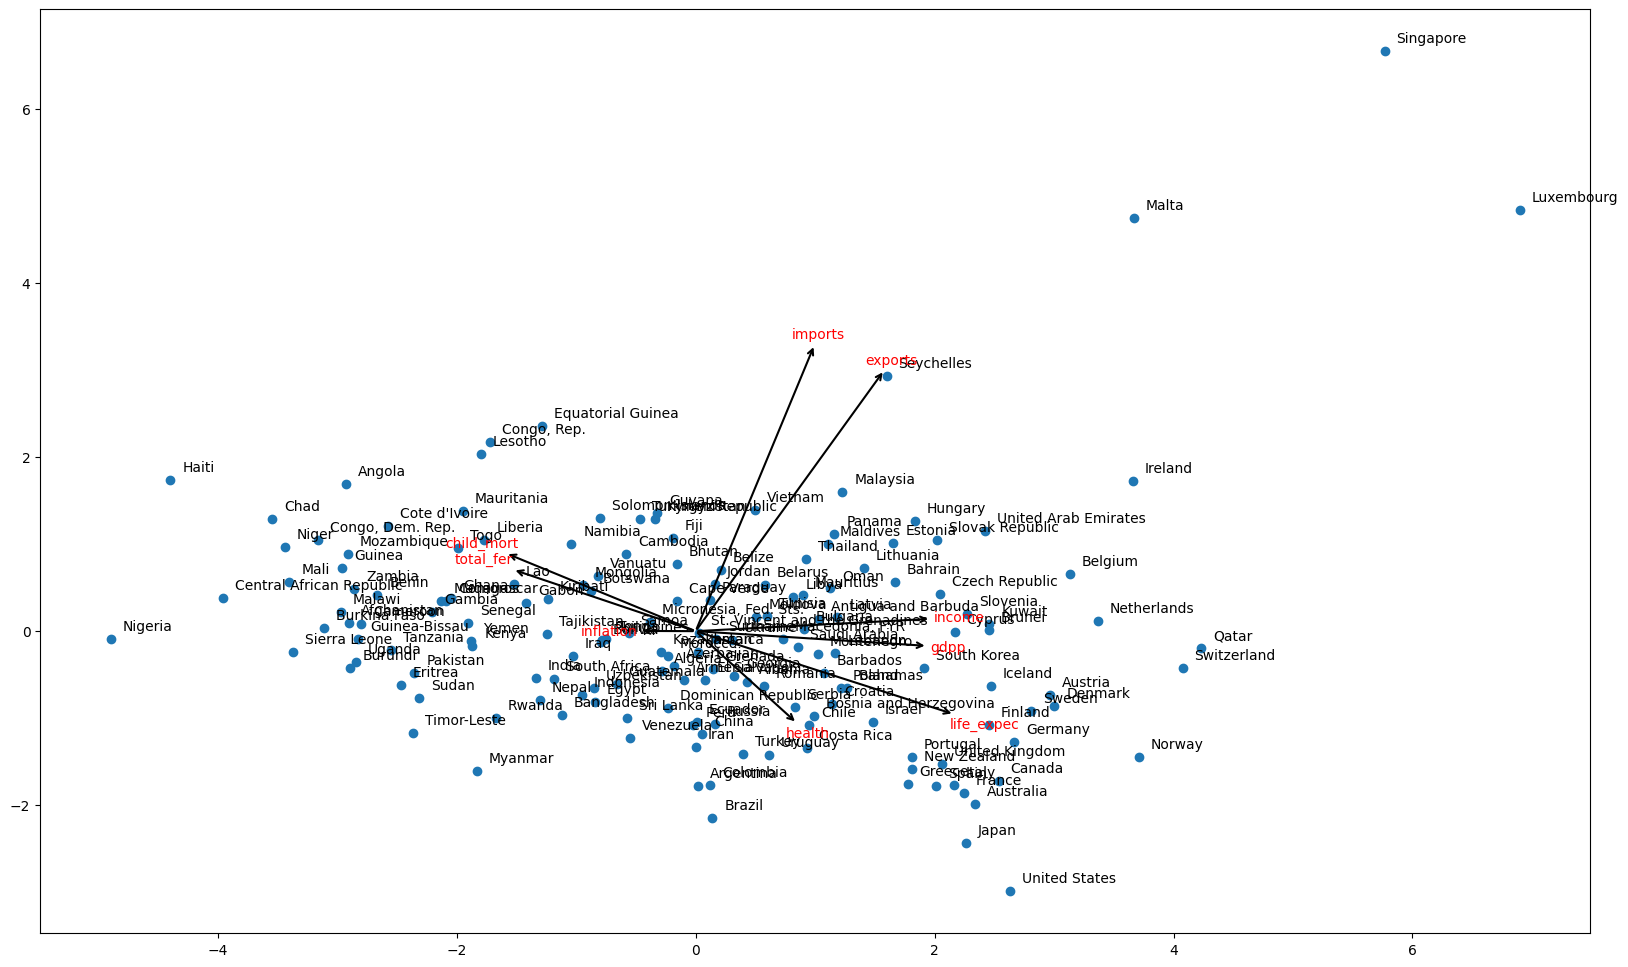

In [18]:
factor = vector[:2,:] # 각 변수를 증가시킬때 주성분상에서 어떤 방향으로 증가?

plt.figure(figsize=(20,12)) # 그림의 크기 조절
plt.scatter(z1,z2) # 주성분에 따라 원데이터를 산점도로 표현

for i in range(len(Z)): # 국가별 데이터포인트에 국가명을 표시
    plt.annotate(country[i], # i번째 국가
     (z1[i]+0.1, z2[i]+0.1)) # i번째 국가의 이름이 찍힐 포인트

for i in range(9):
    plt.annotate(df2.columns[i],xy=(0,0),xytext=(factor[:,i]*5),arrowprops={'lw':1.5, 'arrowstyle':'<-'}, c='r')